In this Notebook all preprocessing and training is done for training data, for test data there is seperate notebbok..🌿😊

In [96]:
import numpy as np
import pandas as pd

In [97]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [99]:
df.sample(5)
df.shape

(54273, 13)

In [100]:
df=df.drop(columns=['clean_title'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 5.0+ MB


In [102]:
(df.int_col.value_counts().head(8))

Black        31820
Beige         7995
Gray          6252
Brown         2239
Red           1499
White         1172
–             1045
Jet Black      365
Name: int_col, dtype: int64

In [103]:
sum(dt.brand.value_counts().head(10))

25192

Now one  by one I will remove things have less freuency

In [104]:
req_ext=df.ext_col.value_counts().head(6).index

In [105]:
x=df.ext_col
for i in x:
    if i not in req_ext:
        x.replace(i,'other',inplace=True)

In [106]:
df=df.drop(columns=['ext_col'])
df=df.join(x)

In [107]:
req_int=df.int_col.value_counts().head(6).index

In [108]:
x=df.int_col
for i in x:
    if i not in req_int:
        x.replace(i,'other',inplace=True)

In [109]:
df=df.drop(columns=['int_col'])

In [110]:
df=df.join(x)

In [111]:
df.ext_col.value_counts()

Black     15078
White     13422
Gray       7909
Silver     5161
other      5022
Blue       4668
Red        3013
Name: ext_col, dtype: int64

In [112]:
del(x)

In [113]:
req_transmit=df.transmission.value_counts().head(7).index

In [114]:
x=df.transmission
for i in x:
    if i not in req_transmit:
        x.replace(i,'other',inplace=True)

In [115]:
df=df.drop(columns=['transmission'])

In [116]:
df=df.join(x)

In [117]:
df.transmission.value_counts()

A/T                               16757
other                              8611
8-Speed A/T                        7287
Transmission w/Dual Shift Mode     6454
6-Speed A/T                        5944
6-Speed M/T                        3618
7-Speed A/T                        3415
10-Speed A/T                       2187
Name: transmission, dtype: int64

In [118]:
x=df.fuel_type
x.replace('Gasoline',0,inplace=True)
x.replace('Hybrid',1,inplace=True)
x.replace('E85 Flex Fuel',2,inplace=True)
x.replace('Diesel',3,inplace=True)
x.replace(['Plug-In Hybrid','–','not supported'],4,inplace=True)

In [119]:
df=df.drop(columns=['fuel_type'])

In [120]:
df=df.join(x)

here I have compied all manupulations done on test.ipynb..🥲


In [121]:
x=dt.fuel_type
x.replace('Gasoline',0,inplace=True)
x.replace('Hybrid',1,inplace=True)
x.replace('E85 Flex Fuel',2,inplace=True)
x.replace('Diesel',3,inplace=True)
x.replace(['Plug-In Hybrid','–','not supported'],4,inplace=True)
dt=dt.drop(columns=['fuel_type'])
dt=dt.join(x)
req_transmit=dt.transmission.value_counts().head(7).index
x=dt.transmission
for i in x:
    if i not in req_transmit:
        x.replace(i,'other',inplace=True)
dt=dt.drop(columns=['transmission'])
dt=dt.join(x)
dt.transmission.unique()
req_int=dt.int_col.value_counts().head(6).index
x=dt.int_col
for i in x:
    if i not in req_int:
        x.replace(i,'other',inplace=True)
dt=dt.drop(columns=['int_col'])
dt=dt.join(x)
req_ext=dt.ext_col.value_counts().head(6).index
x=dt.ext_col
for i in x:
    if i not in req_ext:
        x.replace(i,'other',inplace=True)
dt=dt.drop(columns=['ext_col'])
dt=dt.join(x)
dt.ext_col.unique()

array(['White', 'Silver', 'Blue', 'Red', 'Black', 'Gray', 'other'],
      dtype=object)

In [122]:
df.accident.value_counts()

None reported                             39896
At least 1 accident or damage reported    14377
Name: accident, dtype: int64

In [147]:
# dt=dt.drop(columns=['clean_title'])
dt.sample(5)
import seaborn as sns

In [ ]:
hp_x=df['engine'].apply(lambda x:x.split('HP')[0]).apply(pd.to_numeric,errors='coerce')
hp_y=dt['engine'].apply(lambda x:x.split('HP')[0]).apply(pd.to_numeric,errors='coerce')
sns.histplot(data=hp_x,kde=True)
sns.histplot(data=hp_y,kde=True)

In [165]:
hp_y.isnull().sum()

0

<AxesSubplot: xlabel='engine', ylabel='Count'>

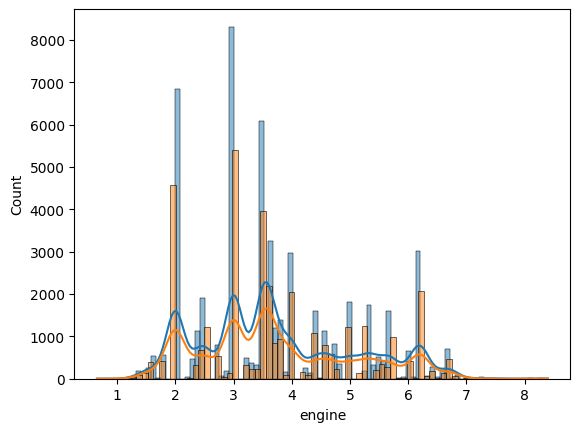

In [152]:
liters_x=df['engine'].apply(lambda x:x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric,errors='coerce')
liters_y=dt['engine'].apply(lambda x:x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric,errors='coerce')
sns.histplot(data=liters_x,kde=True)
sns.histplot(data=liters_y,kde=True)

In [160]:
dt.engine

0        302.0
1        275.0
2        241.0
3        518.0
4        335.0
         ...  
36178    420.0
36179    295.0
36180    132.0
36181    450.0
36182    320.0
Name: engine, Length: 36183, dtype: float64

we can see that both liters and hp are right -skewed not normally distributted so we will replace nan with median instead of mean values to get good results..

In [171]:
# liters_y=liters_y.fillna(liters_y.mode())
#by mistake i replace with mode...so I will nedd to again get liters_y
# liters_y_=dt['engine'].apply(lambda x:x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric,errors='coerce')
liters_y_=liters_y.fillna(liters_y.median())
liters_x=liters_x.fillna(liters_x.median())
hp_x=hp_x.fillna(hp_x.median())
hp_y=hp_y.fillna(hp_y.median())
df=df.drop(columns=['engine'])
dt=dt.drop(columns=['engine'])
df=df.join(hp_x)
dt=dt.join(hp_y)
# df=df.join(liters_x)
# dt=dt.join(liters_y)

In [172]:
dt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            36183 non-null  int64  
 1   brand         36183 non-null  object 
 2   model         36183 non-null  object 
 3   model_year    36183 non-null  int64  
 4   milage        36183 non-null  int64  
 5   accident      36183 non-null  object 
 6   fuel_type     36183 non-null  int64  
 7   transmission  36183 non-null  object 
 8   int_col       36183 non-null  object 
 9   ext_col       36183 non-null  object 
 10  engine        36183 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 3.0+ MB


here we have done column transformation using onehot and ordinal encoder..🌿🌿


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [125]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['None reported','At least 1 accident or damage reported']]),['accident']),
    ('tnf2',OneHotEncoder(sparse_output= False),['ext_col','int_col','transmission'])
],remainder='passthrough')
    

In [126]:
features=['ext_col','int_col','transmission','fuel_type','model_year','milage','accident']
X_train=df[features]
Y_train=df.price
X_test=dt[features]

In [174]:
X_train=transformer.fit_transform(X_train)

ValueError: Specifying the columns using strings is only supported for dataframes.

In [173]:
X_train.shape

(54273, 26)

In [129]:
X_test=transformer.transform(X_test)

In [130]:
df.head(1)

,id,brand,model,model_year,milage,engine,accident,price,ext_col,int_col,transmission,fuel_type
0,0,Ford,F-150 Lariat,2018,74349,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,11000,Blue,Gray,10-Speed A/T,0


Now we will start training our model via different algos and try to tune their hyperparameters...☠️☠️

In [131]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(random_state=1)
forest_model.fit(X_train,Y_train)
forest_predict=forest_model.predict(X_test)

In [132]:
output_forset = pd.DataFrame({'Id': dt.id,
                       'price': forest_predict})
output_forset.to_csv('submission.csv', index=False)

In [133]:
dt.tail(5)

,id,brand,model,model_year,milage,engine,accident,fuel_type,transmission,int_col,ext_col
36178,90451,GMC,Yukon Denali,2019,4500,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,None reported,0,10-Speed A/T,Black,Gray
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,At least 1 accident or damage reported,0,other,Gray,Red
36180,90453,Toyota,Corolla LE,2011,116000,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,None reported,0,other,Gray,other
36181,90454,Lincoln,Navigator Reserve,2019,39000,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,0,10-Speed A/T,other,Black
36182,90455,Chevrolet,Tahoe LT,2012,162731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,At least 1 accident or damage reported,2,A/T,Black,Black


In [134]:
#doing train test split to select hyperparameters..--
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import root_mean_squared_error

In [135]:
train_x,test_x,train_y,test_y=train_test_split(X_train,Y_train,test_size=0.2,random_state=1)

In [136]:
# from sklearn.model_selection import RandomizedSearchCV
# rf=RandomForestRegressor(random_state=1)
# # Define the parameter grid
# param_distributions = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Use RandomizedSearchCV to search for the best parameters
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
# n_iter=100,  random_state=1,scoring='root_mean_squared_error')

# # Fit the random search to the data
# random_search.fit(train_x,train_y,)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# # Train the model with the best parameters on the entire training set
# best_rf = random_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_rf.predict(test_x)

# # Evaluate the model
# mse = root_mean_squared_error(test_y, y_pred)
# print(f"Mean Squared Error on test set: {mse}")


In [140]:
rf = RandomForestRegressor(random_state=1)

# Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Use GridSearchCV to search for the best parameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                             scoring='neg_mean_squared_error')

# Fit the grid search to the data
rf.fit(train_x,train_y)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# Train the model with the best parameters on the entire training set
# best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = rf.predict(test_x)

# Evaluate the model
mse = root_mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 73859.05082985133


In [139]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
my_model.fit(X_train,Y_train,early_stopping_rounds=5,eval_set=[(test_x,test_y)],verbose=False)
y_pred=my_model.predict(X_test)
output_forset = pd.DataFrame({'Id': dt.id,
                       'price': y_pred})
output_forset.to_csv('submission_xgb.csv', index=False)
# mse = root_mean_squared_error(test_y, y_pred)
# print(f"Mean Squared Error on test set: {mse}")

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [10855, 36183]